In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import plotly.express as px

In [4]:
# loading and cleaning up the data
energy_df = pd.read_csv('owid-energy-data.csv')
# filter out any records before 2000
energy_df = energy_df[energy_df.year >= 2000]
# replace 0.0 with NaN
energy_df.replace(0.0, np.nan, inplace=True)
# dropping gdp column, because it is incomplete
energy_df.drop(['gdp'], axis=1, inplace=True)

#### Renewable Energy Usage

We often hear about the rapid growth of renewable energy usage, but how much renewable energy are we consuming compare to traditional energy.

In the chart below we can see we are consuming much more renewable energy since 2000.  And the growth mainly come from wind, solar, and other renewable. 

<AxesSubplot: title={'center': 'Global Renewable Consumption 2000 - 2021'}, xlabel='Year', ylabel='Terrawatt pre Hour'>

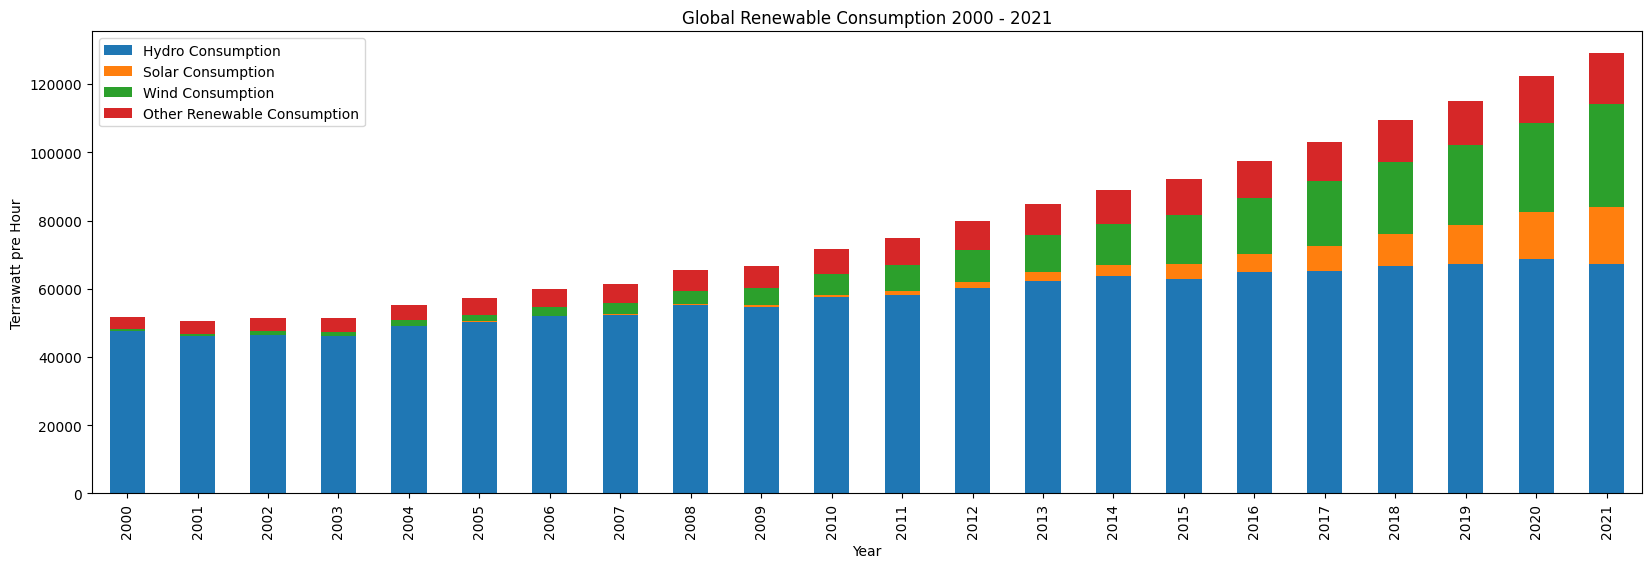

In [5]:
country_year = ["iso_code","country", "year"]
consumption = ["hydro_consumption","solar_consumption","wind_consumption","other_renewable_consumption"]
rename_columns = {"hydro_consumption":"Hydro Consumption", "solar_consumption":"Solar Consumption", "wind_consumption":"Wind Consumption", \
                    "other_renewable_consumption":"Other Renewable Consumption"}
renewable_consumption_df = energy_df[country_year + consumption].groupby('year').sum(numeric_only=True)
renewable_consumption_df.reset_index(inplace=True)
renewable_consumption_df.rename(rename_columns, axis=1, inplace=True)

# Bar Plot
renewable_consumption_df.plot(x='year', xlabel='Year',ylabel='Terrawatt pre Hour', kind='bar', stacked=True,figsize=(20,6), \
                                title='Global Renewable Consumption 2000 - 2021', grid=False)

#### Renewables in Electricity

Renewable energy is primarily used to generate electricity, let's examine the percentage of electricity consumed in each country that comes from renewable sources.

The chart shows that Iceland, the top country in terms of renewable energy use, generates almost all of its electricity (99.98%) from renewable sources.


In [6]:
# filter out columns
wanted_col = ["iso_code","country", "electricity_generation", "renewables_electricity"]
renewables_electricity_generation_2021 = energy_df[energy_df.year == 2021]
renewables_electricity_generation_2021 = renewables_electricity_generation_2021[wanted_col]

# calculate the percentage (renewables_electricity * 100) / electricity_generation
renewables_electricity_generation_2021['Renewables Percentage'] = (renewables_electricity_generation_2021['renewables_electricity'] * 100) / renewables_electricity_generation_2021['electricity_generation']

fig = px.choropleth(renewables_electricity_generation_2021, locations=renewables_electricity_generation_2021['country'], 
                        color=renewables_electricity_generation_2021['Renewables Percentage'],
                        locationmode = 'country names',
                        #locationmode = 'ISO-3', 
                        color_continuous_scale="tealrose",
                        #title='Percentage of electricity production from renewables, 2021'
                        )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Upon further analysis, it becomes clear that the oil, gas, and coal production country relies less on renewable energy for electricity generation.

In [12]:
wanted_col = ["iso_code","country", "oil_production"]
fossil_production_2021 = energy_df[(energy_df.year == 2021) & (energy_df.iso_code.notna())]
fossil_production_2021 = fossil_production_2021[wanted_col]

fig = px.choropleth(fossil_production_2021, locations=fossil_production_2021['country'], 
                        color=fossil_production_2021['oil_production'],
                        locationmode = 'country names',
                        #locationmode = 'ISO-3', 
                        color_continuous_scale="tealrose",
                        labels={'oil_production':'Oil Production'},
                        #title='Oil Production, 2021'
                        )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [14]:
wanted_col = ["iso_code","country", "gas_production"]
fossil_production_2021 = energy_df[(energy_df.year == 2021) & (energy_df.iso_code.notna())]
fossil_production_2021 = fossil_production_2021[wanted_col]

fig = px.choropleth(fossil_production_2021, locations=fossil_production_2021['country'], 
                        color=fossil_production_2021['gas_production'],
                        locationmode = 'country names',
                        #locationmode = 'ISO-3', 
                        color_continuous_scale="tealrose",
                        labels={'gas_production':'Gas Production'},
                        #title='Gas Production, 2021'
                        )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [15]:
wanted_col = ["iso_code","country", "coal_production"]
fossil_production_2021 = energy_df[(energy_df.year == 2021) & (energy_df.iso_code.notna())]
fossil_production_2021 = fossil_production_2021[wanted_col]

fig = px.choropleth(fossil_production_2021, locations=fossil_production_2021['country'], 
                        color=fossil_production_2021['coal_production'],
                        locationmode = 'country names',
                        #locationmode = 'ISO-3', 
                        color_continuous_scale="tealrose",
                        labels={'coal_production':'Coal Production'},
                        #title='Coal Production, 2021'
                        )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### Renewable vs Traditional Energy Usage

To what extent are we using renewable energy compared to traditional energy?  The chart shows that we are relying heavily on traditional energy compared to renewable energy.

<AxesSubplot: xlabel='Year', ylabel='Terrawatt pre Hour'>

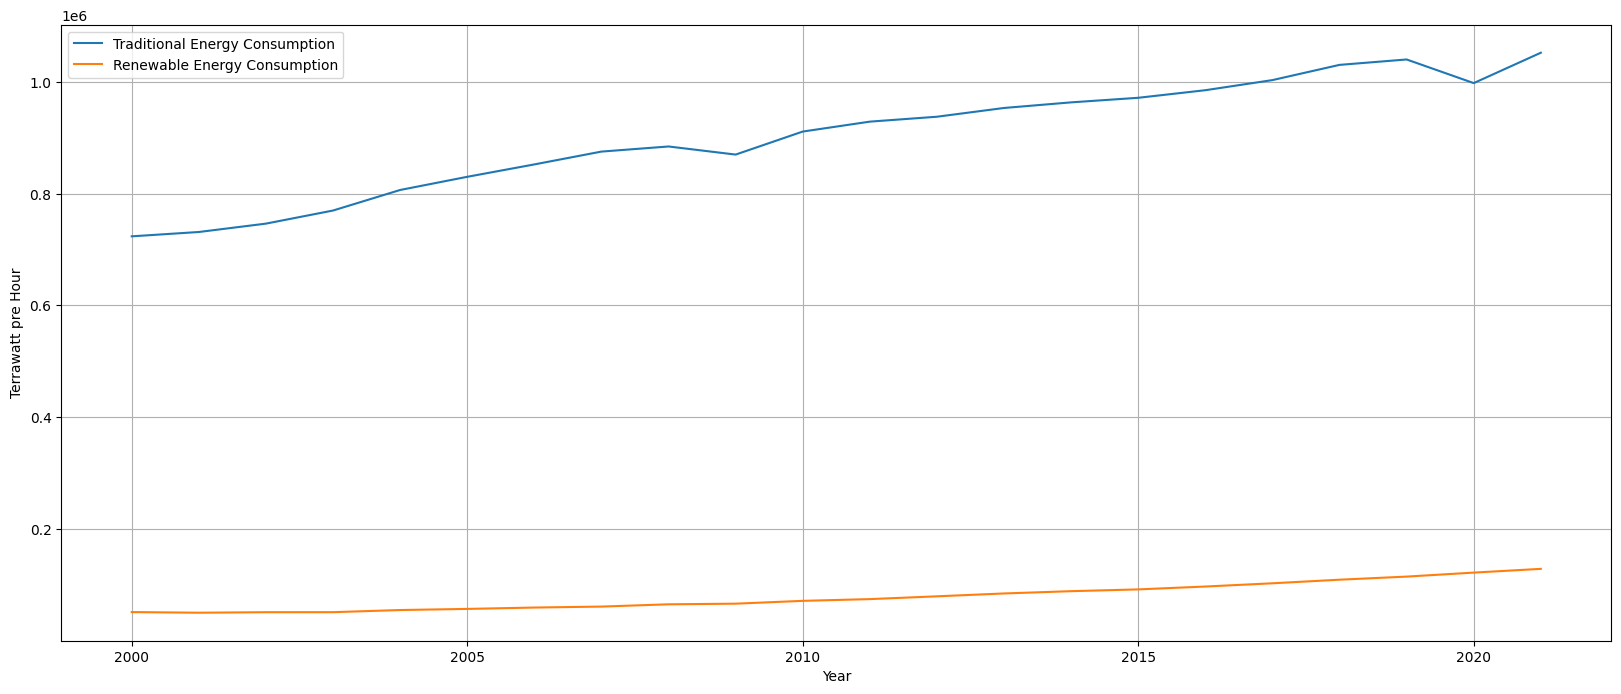

In [16]:
# data filters
traditional_energy = ['biofuel_consumption', 'coal_consumption', 'gas_consumption', 'low_carbon_consumption', 'nuclear_consumption', 'oil_consumption']
renewable_energy = ['hydro_consumption', 'other_renewable_consumption',  'solar_consumption', 'wind_consumption']

# calculate renewable consumption
renewable_consumption_df = energy_df[['year'] + renewable_energy].groupby('year').sum(numeric_only=True)
renewable_consumption_df['Renewable Consumption'] = renewable_consumption_df.sum(axis=1)

# calculate traditional consumption
traditional_consumption_df = energy_df[['year'] + traditional_energy].groupby('year').sum(numeric_only=True)
traditional_consumption_df['Traditional Consumption'] = traditional_consumption_df.sum(axis=1)

# create new data frame
frame = { 'Traditional Energy Consumption': traditional_consumption_df['Traditional Consumption'], 'Renewable Energy Consumption': renewable_consumption_df['Renewable Consumption'] }
traditional_vs_renewable_consumption = pd.DataFrame(frame)
traditional_vs_renewable_consumption.reset_index(inplace=True)

# line plot
traditional_vs_renewable_consumption.plot.line(x='year', figsize=(20, 8), grid=True, ylabel='Terrawatt pre Hour', xlabel='Year')

Since renewable energy is primarily used for electricity generation, while oil is typically used for fuel, gas for heating, and coal for electricity generation. Let us further compare our consumption on oil, gas, and coal with renewable. 

The chart indicates that we are far from replacing fossil fuels with renewable energy.

<AxesSubplot: xlabel='Year', ylabel='Terrawatt pre Hour'>

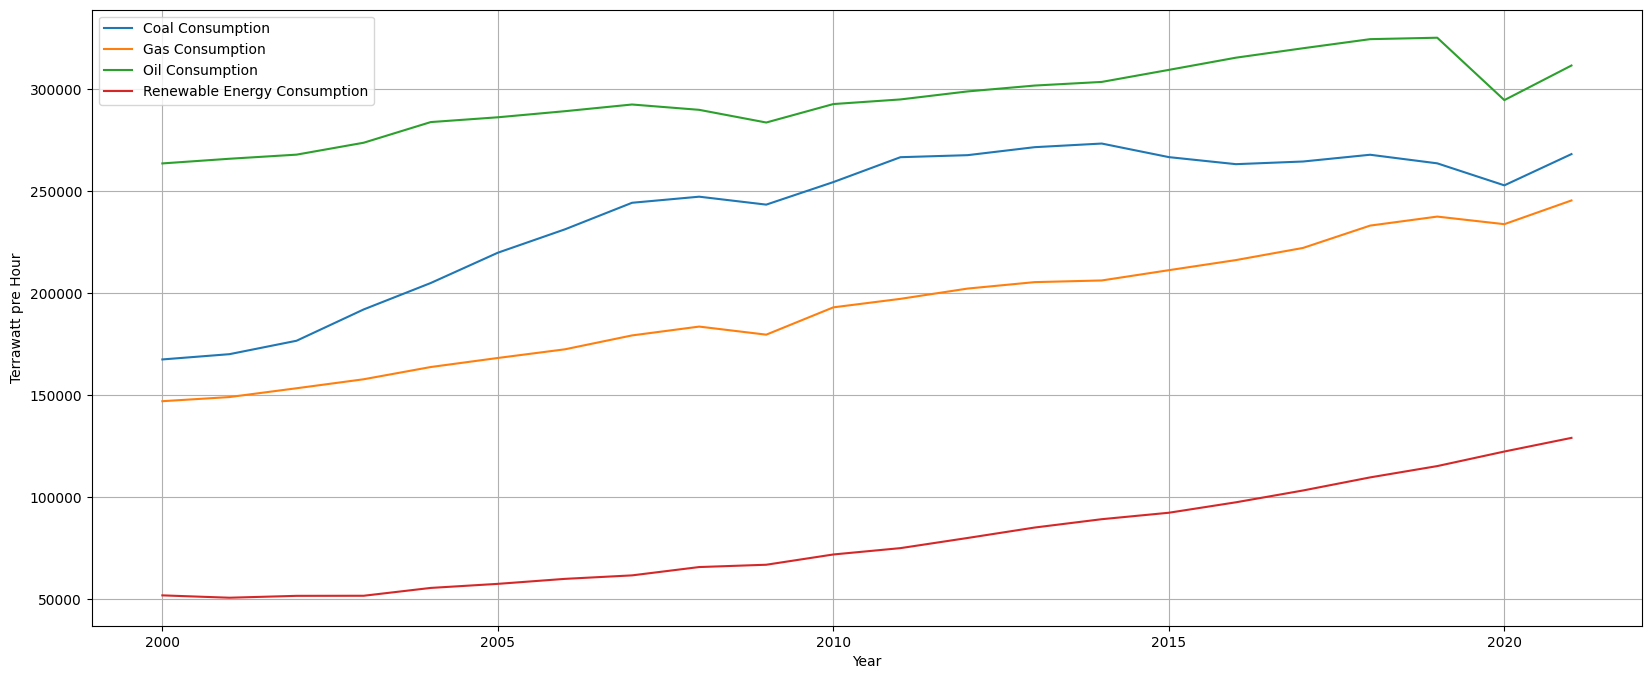

In [11]:
fossil_energy = ['coal_consumption', 'gas_consumption', 'oil_consumption']
renewable_energy = ['hydro_consumption', 'other_renewable_consumption',  'solar_consumption', 'wind_consumption']

renewable_consumption_df = energy_df[['year'] + renewable_energy].groupby('year').sum(numeric_only=True)
renewable_consumption_df['Renewable Consumption'] = renewable_consumption_df.sum(axis=1)

fossil_consumption_df = energy_df[['year'] + fossil_energy].groupby('year').sum(numeric_only=True)


frame = { 'Coal Consumption': fossil_consumption_df['coal_consumption'], 'Gas Consumption':fossil_consumption_df['gas_consumption'], \
        'Oil Consumption':fossil_consumption_df['oil_consumption'], 'Renewable Energy Consumption': renewable_consumption_df['Renewable Consumption'] }

fossil_vs_renewable_consumption = pd.DataFrame(frame)
fossil_vs_renewable_consumption.reset_index(inplace=True)
fossil_vs_renewable_consumption.plot.line(x='year', figsize=(20, 8), grid=True, ylabel='Terrawatt pre Hour', xlabel='Year')

#### Conclusion

There has been a significant increase in renewable energy use over the past two decades, but we have a long way to go before we can fully transition from fossil fuels to renewable energy. Also fossil fuel production country relies less on renewable energy for electricity generation.